# TASK-2:EXPLORATORY DATA ANALYSIS(EDA)

## OBJECTIVE:
- Calculate summary statistics (mean, median, mode,standard deviation).
- Visualize data distributions using histograms, boxplots and scatter plots.
- Find correlations between numerical features.

### 1. IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. READING THE CSV FILE

In [10]:
stock=pd.read_csv('Stock Prices Data Set.csv')
print(stock)

       symbol        date      open      high       low     close    volume
0         AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1        AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2         AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3        ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4         ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
...       ...         ...       ...       ...       ...       ...       ...
497467    XYL  2017-12-29   68.5300   68.8000   67.9200   68.2000   1046677
497468    YUM  2017-12-29   82.6400   82.7100   81.5900   81.6100   1347613
497469    ZBH  2017-12-29  121.7500  121.9500  120.6200  120.6700   1023624
497470   ZION  2017-12-29   51.2800   51.5500   50.8100   50.8300   1261916
497471    ZTS  2017-12-29   72.5500   72.7600   72.0400   72.0400   1704122

[497472 rows x 7 columns]


### 3. CHECKING FOR NULL VALUES

In [14]:
stock.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [16]:
stock.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [18]:
stock['open']=stock['open'].fillna(86.352275)

In [20]:
stock['high']=stock['high'].fillna(87.132562)

In [22]:
stock['low']=stock['low'].fillna(85.552467)

In [24]:
stock.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

### 4. VERIFYING DATA TYPES

In [27]:
stock.dtypes

symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

### 5. SUMMARY STATISTICS

In [30]:
numeric_col=stock.select_dtypes(include=['number'])

#### a)MEAN: mean is the sum of all values divided by the number of values

In [33]:
print('Mean of columns:')
numeric_col.mean().round(2)

Mean of columns:


open           86.35
high           87.13
low            85.55
close          86.37
volume    4253610.90
dtype: float64

#### b) MEDIAN: The median is the middle value when the values are sorted.

In [36]:
print('Median:')
numeric_col.median()

Median:


open           64.97
high           65.56
low            64.36
close          64.98
volume    2084896.50
dtype: float64

#### c)MODE: mode is the value that occurs most of the time in a sequence of numbers

In [39]:
print('Mode:')
numeric_col.mode().iloc[0]

Mode:


open           70.0
high           72.0
low            77.0
close          34.5
volume    1241019.0
Name: 0, dtype: float64

#### d)STANDARD DEVIATION:  It measures the amount of variation from the mean.

In [42]:
print('Standard Deviation:')
numeric_col.std().round(2)

Standard Deviation:


open          101.47
high          102.31
low           100.57
close         101.47
volume    8232139.24
dtype: float64

### 6. VISUALIZING THE DATA DISTRIBUTION

#### a) HISTOGRAM

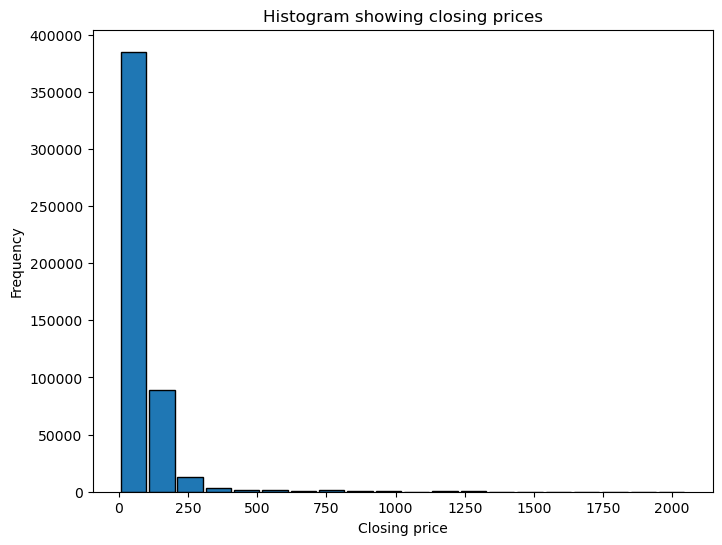

In [46]:
plt.figure(figsize=(8,6))
stock['close'].hist(bins=20,grid=False,rwidth=0.9,edgecolor='Black')
plt.title('Histogram showing closing prices')
plt.xlabel('Closing price')
plt.ylabel('Frequency')
plt.show()

#### INTERPRETATION:
- This histogram illustrates the distribution of stock closing prices.
- The majority of closing prices fall within the range of 0 to 150.
- The highest concentration is observed between 90 to 100.
- It's evident that most of the data is clustered towards the lower end of scale indicating a right skewed distribution.

#### b)BOXPLOT

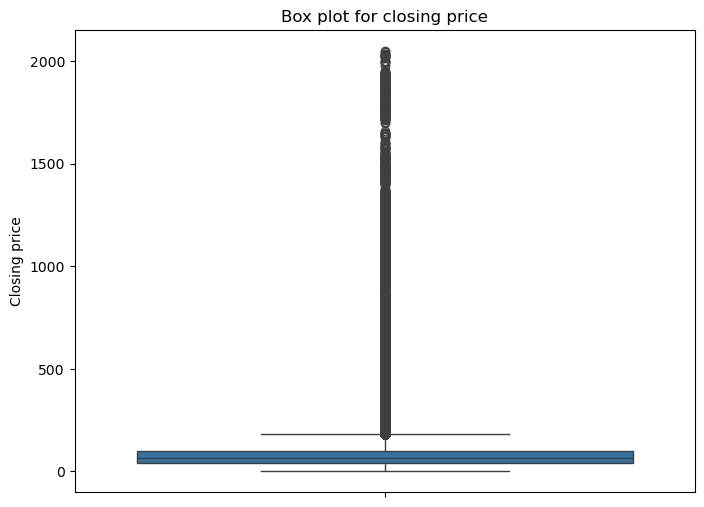

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(y=stock['close'])
plt.title('Box plot for closing price')
plt.ylabel('Closing price')
plt.show()

#### INTERPRETATION:
- The boxplot displays the distribution of stock closing price.
- It clearly highlights the presence of several outliers in the dataset.
- These outliers correspond to unusually high closing prices compared to the rest of the data.

#### c) SCATTER PLOT

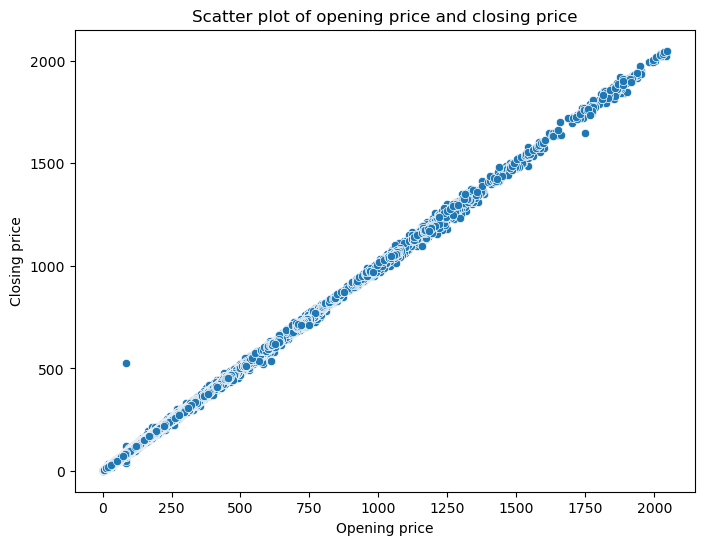

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=stock['open'],y=stock['close'])
plt.title('Scatter plot of opening price and closing price')
plt.xlabel('Opening price')
plt.ylabel('Closing price')
plt.show()

#### INTERPRETATION:
- This scatter plot illustrates the relationship between the opening and closing price of stocks.
- The data points form a pattern that resembles a linear trend.
- As the closing price increases, the opening price tends to rise as well.
- Although there are a few outliers , the majority of the points closely follow a straight line.

### 7. CORRELATION BETWEEN NUMERICAL FEATURES

In [58]:
print(stock.corr(numeric_only=True))

            open      high       low     close    volume
open    1.000000  0.999941  0.999927  0.999856 -0.148724
high    0.999941  1.000000  0.999905  0.999918 -0.148344
low     0.999927  0.999905  1.000000  0.999922 -0.149284
close   0.999856  0.999918  0.999922  1.000000 -0.148839
volume -0.148724 -0.148344 -0.149284 -0.148839  1.000000


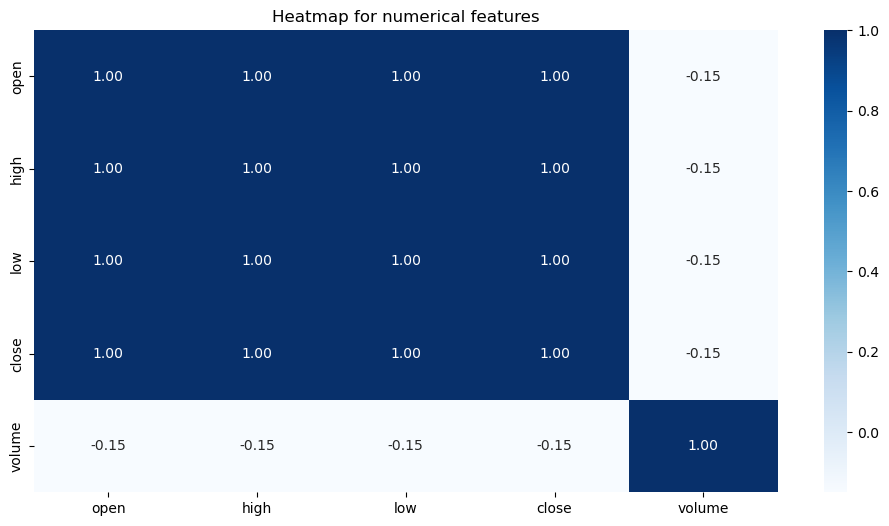

In [62]:
plt.figure(figsize=(12,6))
cm=stock.corr(numeric_only=True)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')
plt.title('Heatmap for numerical features')
plt.show()

#### INTERPRETATION:
- This heatmap illustrates the correlation among numerical features.
- Darker colors indicate strong correlations while lighter represents weaker ones.
- From the visualization, we can see that opening price,low price and closing price are strongly correlated with eachother.
- Volume shows a relatively weak correlation with the other features.